# Problem Description

Analyse Ozone levels over Patiala and make a time series predictive model. Also study the effects of Crop burning activities in Patiala on Ozone levels

## Dataset

Dataset is collected through equippments at Energy and Environment lab of Thapar University, Patiala

## Approach

First we analyse the ozone and other features of our dataset over the year, month and hour and try to give the reasons for their behaviour. Then we have used LSTM on selected features to train a model to predict future values.

In [33]:
import pandas as pd
import re
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
import numpy as np
import math
from sklearn import metrics
from pandas.api.types import is_string_dtype, is_numeric_dtype
import matplotlib.pyplot as plt 
from sklearn.ensemble import forest

In [34]:
df = pd.read_csv('data_clear.csv', low_memory=False, parse_dates=['Date'])



## See distribution of every variable

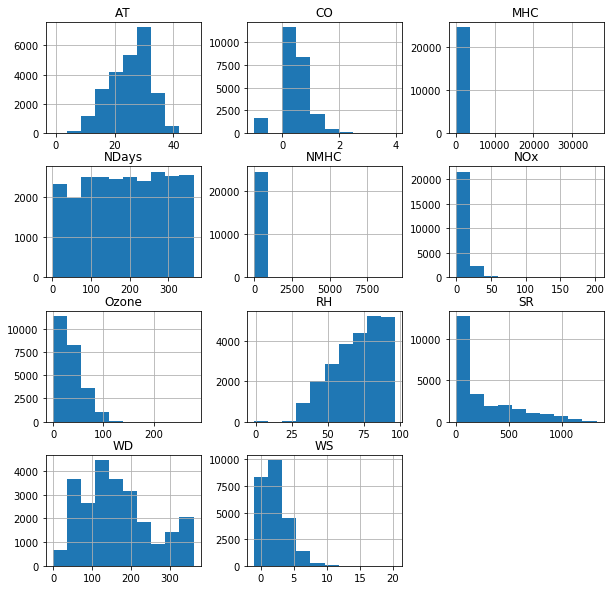

In [35]:
names = df.columns
plt.rcParams["figure.figsize"] = (10,10)
df.hist()
plt.show()

## Look at the scatterplots to find relations

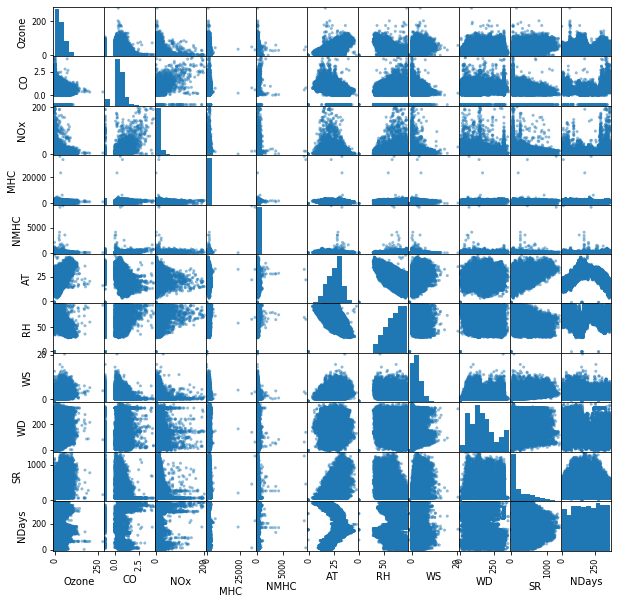

In [36]:
from pandas.plotting import scatter_matrix
scatter_matrix(df)
plt.show()

## We can observe the patterns between Ozone and NOx, AT and CO 

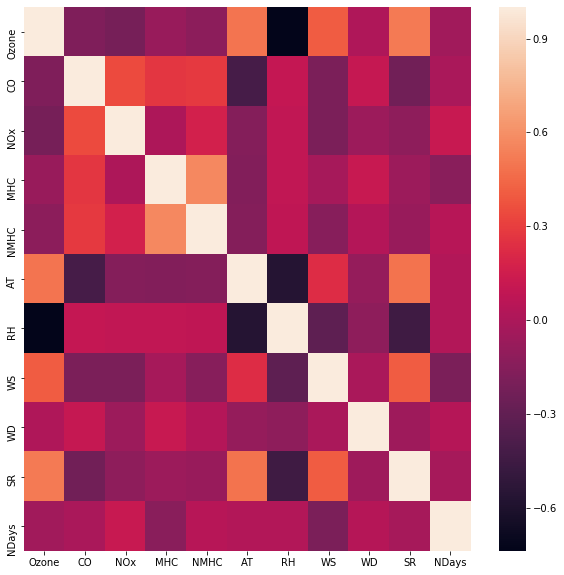

In [37]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [38]:
df=df.drop(columns=['NDays', 'WD'])

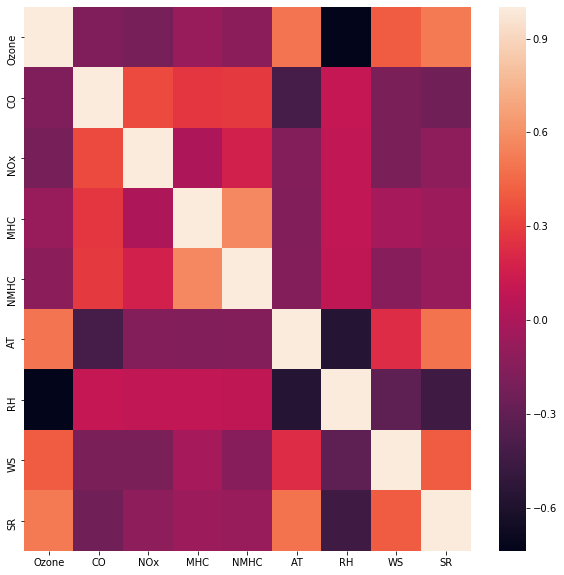

In [39]:
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

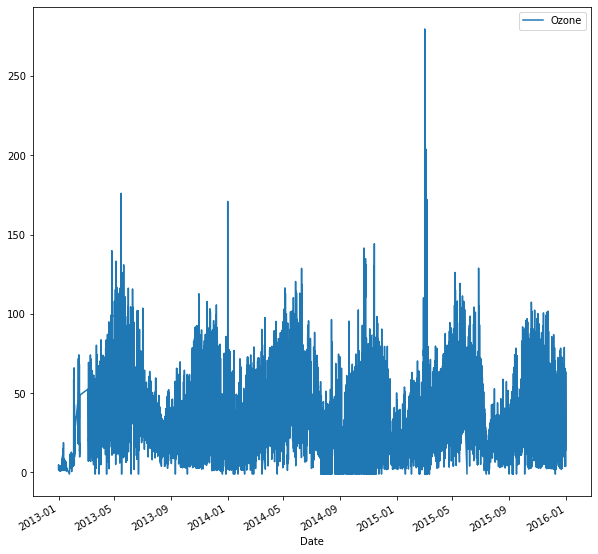

In [40]:
df.plot(x="Date", y=["Ozone"])

## Grouping the Time Series Data by hour

          Ozone        CO        NOx          MHC       NMHC         AT  \
Date                                                                      
0     25.240643  0.535000  11.245702  1388.888441  88.242212  23.798830   
1     23.789248  0.522627  10.567529  1405.781025  87.867490  23.393555   
2     22.281477  0.500675   9.752329  1426.724344  84.748239  23.039335   
3     21.399245  0.490814   9.191225  1449.544245  82.783931  22.646176   
4     19.973627  0.535927   9.761179  1476.029128  81.202706  22.382260   
5     18.599840  0.482064   9.276261  1474.819482  78.040608  22.079362   
6     17.358335  0.475224   9.489801  1492.068744  77.015384  21.828116   
7     15.956683  0.492078  10.481908  1502.263776  77.907023  21.810290   
8     16.824441  0.517485  11.804242  1510.360788  80.007136  22.407086   
9     22.540270  0.542847  12.436553  1489.653606  83.497473  23.700999   
10    31.486027  0.515137  11.090607  1458.283239  86.334569  25.169765   
11    40.310164  0.451638

Text(0.5, 1, 'SR vs Hour')

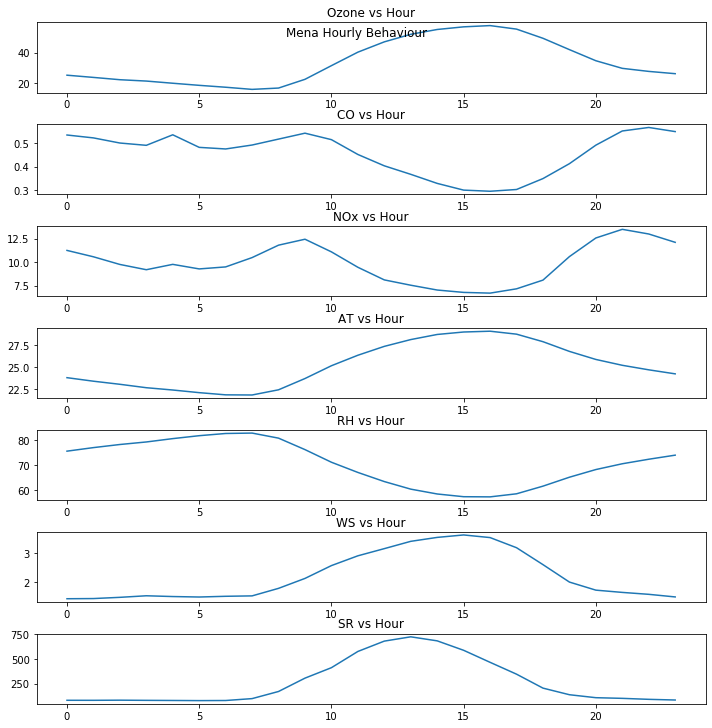

In [41]:
df_hr=df.groupby(df.Date.dt.hour).mean()
print (df_hr)

fig, axs = plt.subplots(7)
fig.suptitle('Mena Hourly Behaviour')

axs[0].plot(df_hr.Ozone)
axs[1].plot(df_hr.CO)
axs[2].plot(df_hr.NOx)
axs[3].plot(df_hr.AT)
axs[4].plot(df_hr.RH)
axs[5].plot(df_hr.WS)
axs[6].plot(df_hr.SR)
fig.tight_layout()
axs[0].set_title('Ozone vs Hour')
axs[1].set_title('CO vs Hour')
axs[2].set_title('NOx vs Hour')
axs[3].set_title('AT vs Hour')
axs[4].set_title('RH vs Hour')
axs[5].set_title('WS vs Hour')
axs[6].set_title('SR vs Hour')




### These horly readings of Ozone, CO, NOx, AT and SR are explainable. As due to diurnal cycle CO and NOx concentrations are more at night and less during the day, another reason for this can also be breaking down of NOx molecules in light. And Ozone concentrations too are more during day because of sunlight under which Oxides of Nitrogen are broken and Ozone is formed

          Ozone        CO        NOx          MHC       NMHC         AT  \
Date                                                                      
2013  34.660000  0.320008  11.598567  1588.981763  80.108018  26.624997   
2014  33.025417  0.430043  14.523957  1154.489540  72.008530  25.826667   
2015  33.874405  0.604674   3.900808  1428.411137  81.243138  23.364633   

             RH        WS          SR  
Date                                   
2013  70.069980  2.143327  327.515556  
2014  69.833639  2.317923  242.178772  
2015  72.345524  2.175736  233.314060  


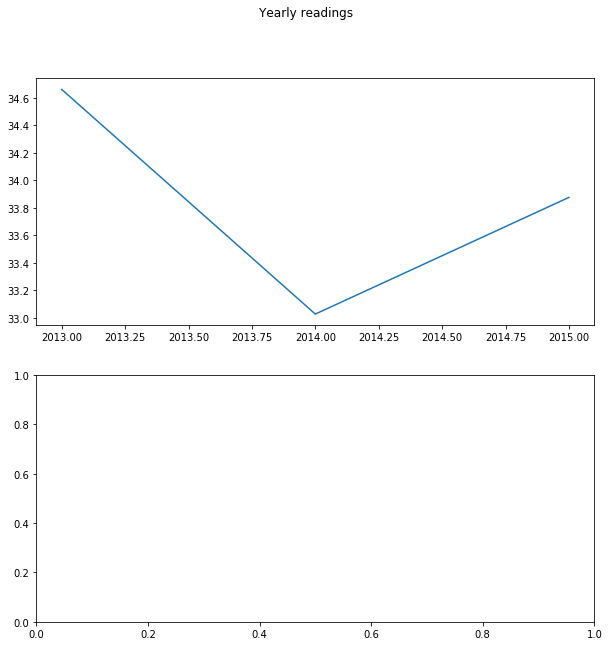

In [42]:
df_yr=df.groupby(df.Date.dt.year).mean()
print (df_yr)
fig, axs = plt.subplots(2)
fig.suptitle('Yearly readings')
axs[0].plot(df_yr.Ozone)


          Ozone        CO        NOx          MHC        NMHC         AT  \
Date                                                                       
1     16.190066  0.760383  11.582571  1621.655822   96.023004  16.246069   
2     28.329700  0.682512  13.311436  1670.171219   86.901375  19.065895   
3     35.247403  0.367383   6.790571  1594.728872   72.888143  22.318827   
4     46.090737  0.452079   6.431772  1425.165397   55.283450  26.853639   
5     55.903381  0.579737   8.614546  1511.088973   78.338615  31.552865   
6     50.632898  0.208477   7.373401  1150.753601   58.583093  31.918786   
7     28.625957  0.215788   7.269114  1714.996904   77.386961  30.714822   
8     19.744798  0.314539   7.622872  1312.426509   59.429512  29.747977   
9     26.714517  0.040359   5.072447  1043.349641   57.383915  28.590631   
10    32.889459  0.239588  12.408346   674.858873   46.608649  26.177874   
11    34.872873  0.733408  13.830995  1243.170437  103.695244  21.354178   
12    27.939

Text(0.5, 1, 'SR vs month')

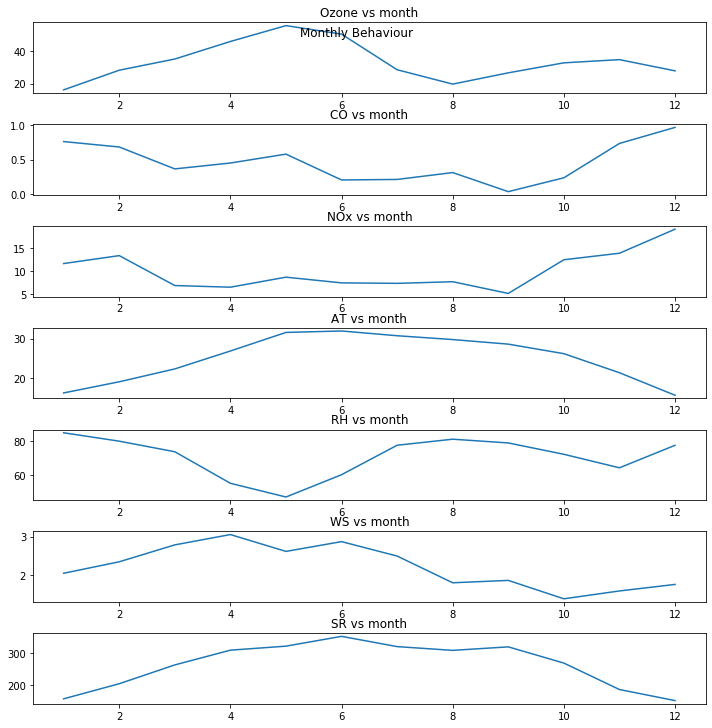

In [44]:
df_month=df.groupby(df.Date.dt.month).mean()
print (df_month)
plt.rcParams["figure.figsize"] = (10,10)
fig, axs = plt.subplots(7)
fig.suptitle('Monthly Behaviour')
axs[0].plot(df_month.Ozone)
axs[1].plot(df_month.CO)
axs[2].plot(df_month.NOx)
axs[3].plot(df_month.AT)
axs[4].plot(df_month.RH)
axs[5].plot(df_month.WS)
axs[6].plot(df_month.SR)

fig.tight_layout()
axs[0].set_title('Ozone vs month')
axs[1].set_title('CO vs month')
axs[2].set_title('NOx vs month')
axs[3].set_title('AT vs month')
axs[4].set_title('RH vs month')
axs[5].set_title('WS vs month')
axs[6].set_title('SR vs month')


## These monthly readings can be explained to. More concentration of Ozone is during Summer months due to higher Solar radiation. Apart from Solar radiations and Ambient Temperature, Agriculture based town like Patiala also witness Crop burning activities during April-March and November-January. Because of which we can see increase in concentrations of Oxides and Ozone

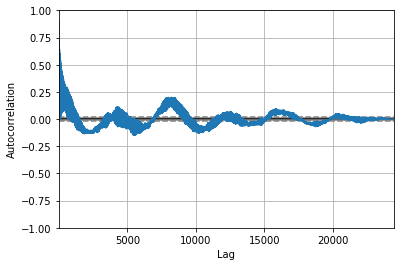

In [10]:

# create an autocorrelation plot
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df['Ozone'])
pyplot.show()


In [19]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):

    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]

    agg = concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# load dataset
fields = ['Ozone', 'CO', 'NOx', 'AT', 'SR']
dataset = read_csv('data_clear.csv', header=0,usecols=fields, index_col=0)
values = dataset.values

# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict
reframed.drop(reframed.columns[[5,6,7]], axis=1, inplace=True)
print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)
1   0.387550   0.079827   0.357741   0.048450  0.407631
2   0.407631   0.093230   0.353556   0.047773  0.375502
3   0.375502   0.078151   0.357741   0.047698  0.349398
4   0.349398   0.070760   0.351464   0.047623  0.341365
5   0.341365   0.070366   0.341004   0.047623  0.343373


In [26]:

# split into train and test sets
values = reframed.values
n_train_hours = 365 * 24*2
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)



(17520, 1, 4) (17520,) (6931, 1, 4) (6931,)


Train on 17520 samples, validate on 6931 samples
Epoch 1/50
 - 1s - loss: 0.0868 - val_loss: 0.0775
Epoch 2/50
 - 0s - loss: 0.0498 - val_loss: 0.0555
Epoch 3/50
 - 0s - loss: 0.0404 - val_loss: 0.0342
Epoch 4/50
 - 0s - loss: 0.0328 - val_loss: 0.0153
Epoch 5/50
 - 0s - loss: 0.0246 - val_loss: 0.0149
Epoch 6/50
 - 0s - loss: 0.0194 - val_loss: 0.0130
Epoch 7/50
 - 0s - loss: 0.0183 - val_loss: 0.0124
Epoch 8/50
 - 0s - loss: 0.0180 - val_loss: 0.0118
Epoch 9/50
 - 0s - loss: 0.0178 - val_loss: 0.0116
Epoch 10/50
 - 0s - loss: 0.0178 - val_loss: 0.0118
Epoch 11/50
 - 0s - loss: 0.0175 - val_loss: 0.0121
Epoch 12/50
 - 0s - loss: 0.0174 - val_loss: 0.0125
Epoch 13/50
 - 0s - loss: 0.0173 - val_loss: 0.0125
Epoch 14/50
 - 0s - loss: 0.0171 - val_loss: 0.0126
Epoch 15/50
 - 0s - loss: 0.0170 - val_loss: 0.0123
Epoch 16/50
 - 0s - loss: 0.0169 - val_loss: 0.0121
Epoch 17/50
 - 0s - loss: 0.0169 - val_loss: 0.0121
Epoch 18/50
 - 0s - loss: 0.0170 - val_loss: 0.0121
Epoch 19/50
 - 0s - loss

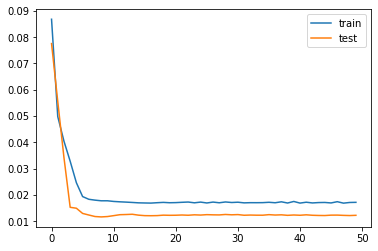

In [27]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [28]:

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.166
